In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Starting dataset
df = pd.read_csv('customer_dataframe.csv', sep='\t', index_col=0)

selected_features = ['TProd','MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']

df2 = df[selected_features]
df2.head()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
CustomerID,,,,
17850,1702,48.629,151.940,3.960
13047,1355,84.688,193.069,3.926
12583,4978,292.824,389.961,2.140
13748,439,87.800,189.650,3.996
15100,58,9.667,105.850,10.950


In [3]:
df2.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TProd          4333 non-null   int64  
 1   MeanProdOrder  4333 non-null   float64
 2   MeanSaleOrder  4333 non-null   float64
 3   MeanPSale      4333 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 169.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TProd           4333 non-null   int64  
 1   DProd           4333 non-null   int64  
 2   MaxPO           4333 non-null   int64  
 3   MinPO           4333 non-null   int64  
 4   MeanProdOrder   4333 non-null   float64
 5   TSale           4333 non-null   float64
 6   MinPSale        4333 non-null   float64
 7   MaxPSale        4333 non-null   float64
 8   MeanSa

# Normalization

In [4]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df2.to_numpy())

# K-MEANS

In [5]:
sse_list = list()
sil_list = list()
davies_list = list()
max_k = 15
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(df_norm)
    
    davies_list.append(davies_bouldin_score(df_norm, kmeans_iter.labels_))
    sil_list.append(silhouette_score(df_norm, kmeans_iter.labels_))
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

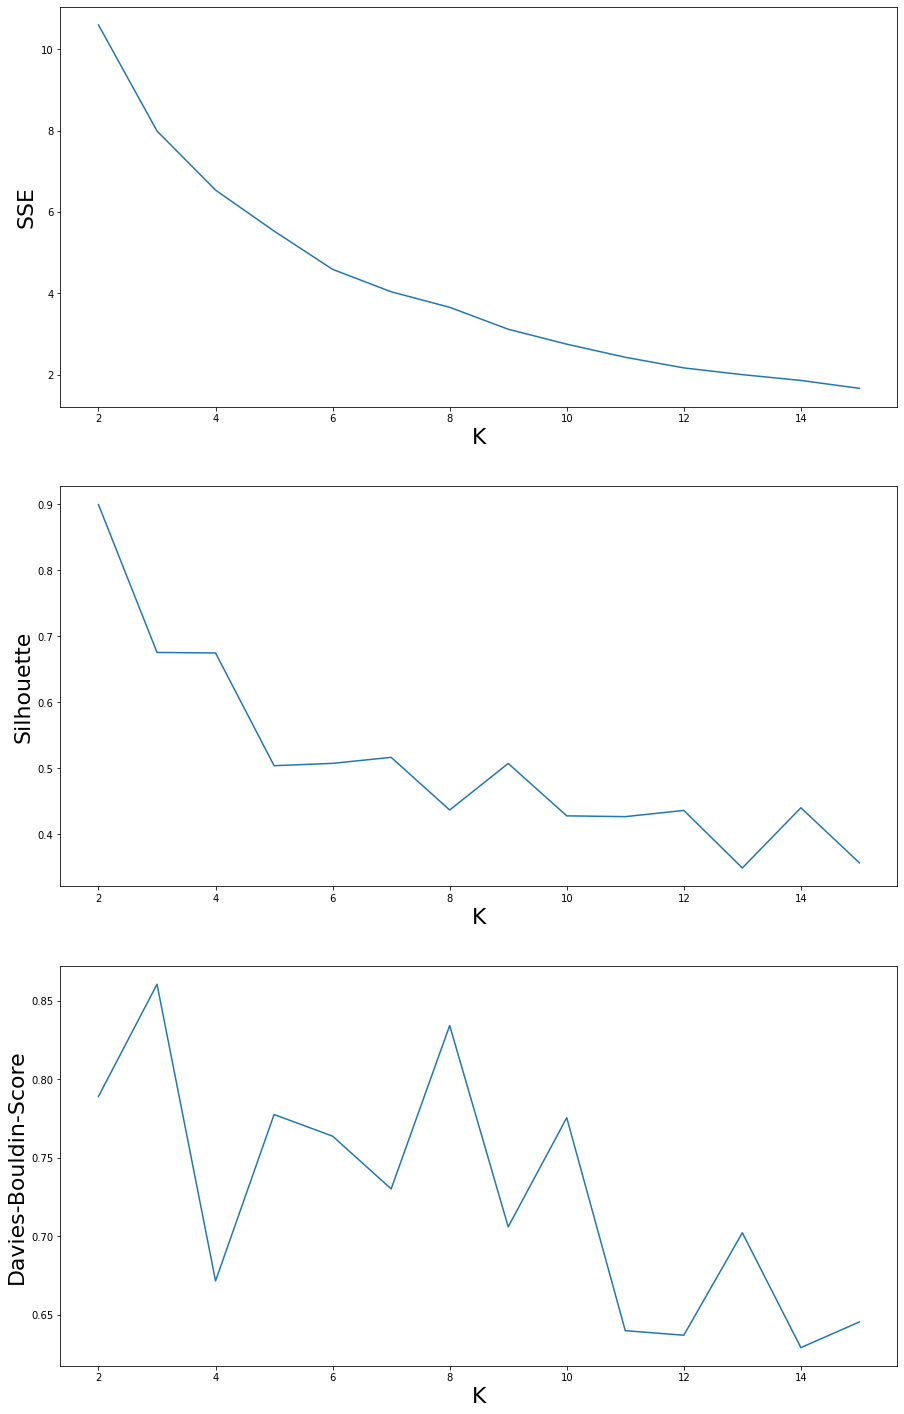

In [6]:
fig, axs = plt.subplots(3,1,figsize=(15,25))
axs[0].plot(range(2, len(sse_list) + 2), sse_list)
axs[0].set_ylabel('SSE', fontsize=22)
axs[0].set_xlabel('K', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=10)

axs[1].plot(range(2, len(sil_list) + 2), sil_list)
axs[1].set_ylabel('Silhouette', fontsize=22)
axs[1].set_xlabel('K', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=10)

axs[2].plot(range(2, len(davies_list) + 2), davies_list)
axs[2].set_ylabel('Davies-Bouldin-Score', fontsize=22)
axs[2].set_xlabel('K', fontsize=22)
axs[2].tick_params(axis='both', which='major', labelsize=10)

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(df_norm)

KMeans(n_clusters=4, n_init=100)

In [8]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([3857,   25,  450,    1], dtype=int64))

In [9]:
print("SSE:",sse_list[k-2]," - SILHOUETTE:",sil_list[k-2])

SSE: 6.539592830108467  - SILHOUETTE: 0.6746843602500764


In [10]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 3857, 1: 25, 2: 450, 3: 1}

Text(0.5, 0, 'TProd')

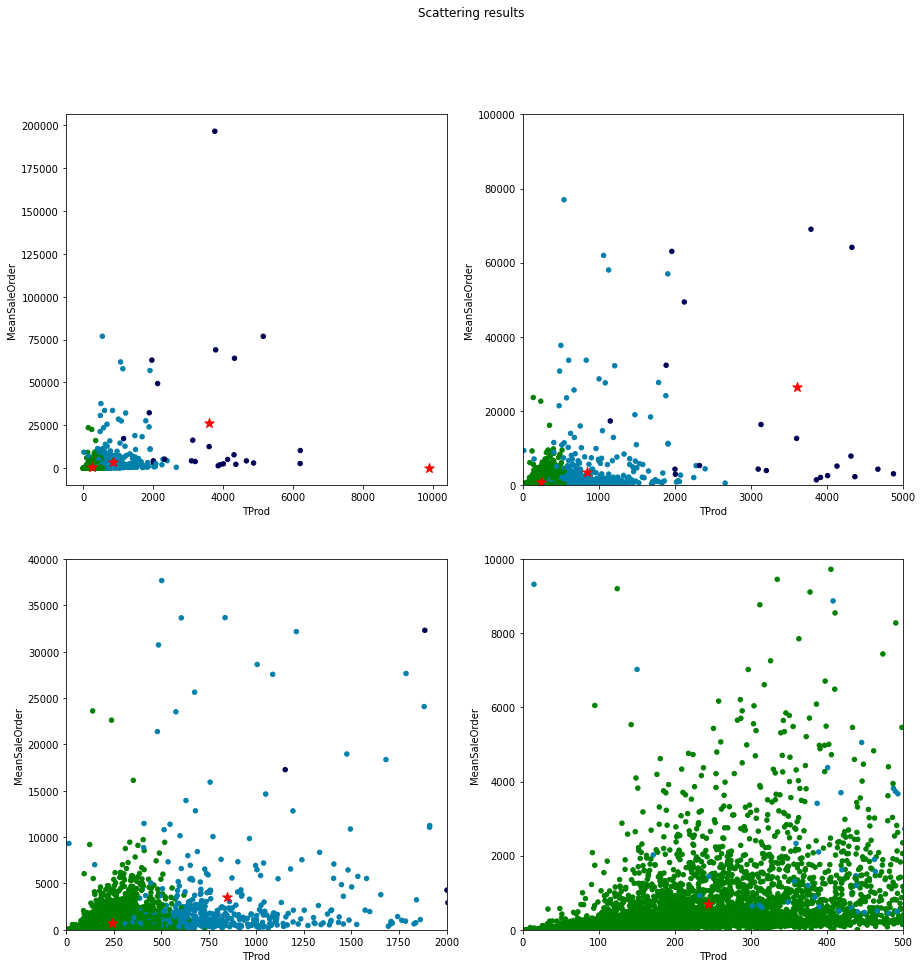

In [11]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Scattering results')

label_s = 10

col1, i1 = df2['MeanSaleOrder'], 2
col2, i2 = df2['TProd'], 0

axs[0][0].scatter(col1, col2, c=kmeans.labels_, s=20, cmap='ocean')
axs[0][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[0][0].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[0][1].set_xlim((0,5000))
axs[0][1].set_ylim((0,100000))
axs[0][1].scatter(col1, col2, c=kmeans.labels_, s=20, cmap='ocean')
axs[0][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[0][1].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[1][0].set_xlim((0,2000))
axs[1][0].set_ylim((0,40000))
axs[1][0].scatter(col1, col2, c=kmeans.labels_, s=20, cmap='ocean')
axs[1][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[1][0].set_xlabel(df2.columns[i2], fontsize=label_s)

axs[1][1].set_xlim((0,500))
axs[1][1].set_ylim((0,10000))
axs[1][1].scatter(col1, col2, c=kmeans.labels_, s=20, cmap='ocean')
axs[1][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_ylabel(df2.columns[i1], fontsize=label_s)
axs[1][1].set_xlabel(df2.columns[i2], fontsize=label_s)

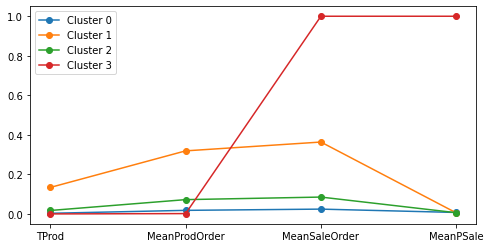

In [12]:
# normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

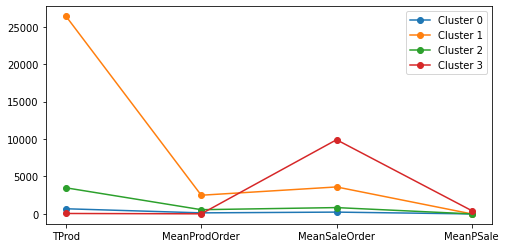

In [13]:
# non normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

# ANALYZING RESULTS

In [14]:
df['Cluster'] = kmeans.labels_

clust_list = list()
for i in tqdm(range(len(df['Cluster'].unique())), total=len(df['Cluster'].unique()), desc="Creating cluster dataframes"):
    clust_list.append(df[df['Cluster'] == i])

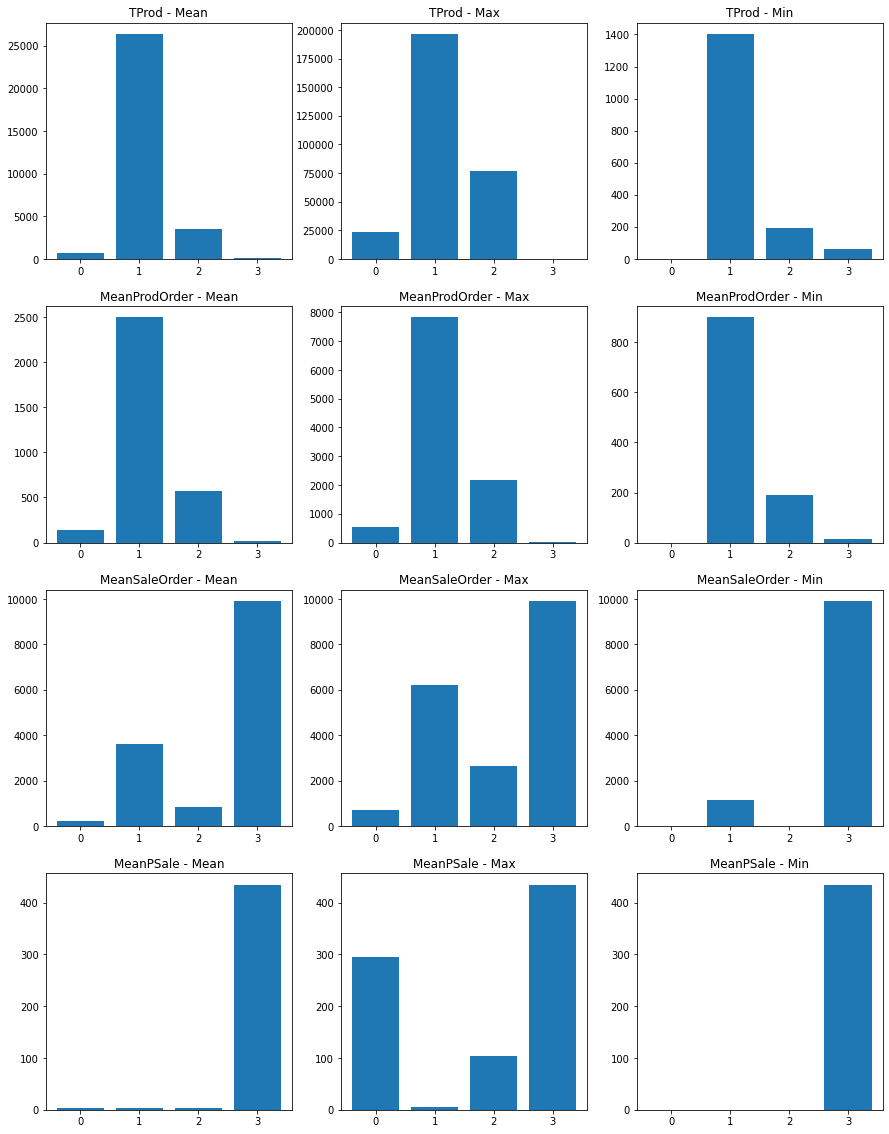

In [15]:
attr = df2.columns
clusters = range(len(clust_list))
fig, axs = plt.subplots(len(attr),3,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
    axs[attr_index][0].bar(clusters, mean_values)
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values)
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values)
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

In [16]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
clust_dict = dict(zip(bins, hist))
print("Clusters and their population:",clust_dict)

Clusters and their population: {0: 3857, 1: 25, 2: 450, 3: 1}


In [17]:
to_remove = -1
to_englobe = -1

for key in clust_dict.keys():
    if clust_dict[key] == 1:
        to_remove = key
    elif clust_dict[key] == 3858:
        to_englobe = key

clust_list[to_englobe].describe()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
count,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.000,1.0,1.00,1.0,1.0,1.0,1.0
mean,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
25%,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
50%,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
75%,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
max,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0


In [18]:
clust_list[to_remove]

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.65,3,2.0,2.0,3


**Since cluster 3 is composed of only 1 value and by itself can compromise our results we simply append it to its most similar cluster**

In [19]:
clust_list[to_englobe] = clust_list[to_englobe].append(clust_list[to_remove])

In [20]:
clust_list[to_englobe].describe()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
count,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.000,2.0,2.00,2.0,2.0,2.0,2.0
mean,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
std,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0
min,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
25%,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
50%,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
75%,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0
max,61.0,1.0,60.0,1.0,15.25,39619.5,297.0,38970.0,9904.875,60.0,434.65,3.0,2.0,2.0,3.0


In [21]:
clust_list.pop(to_remove)

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.65,3,2.0,2.0,3
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.65,3,2.0,2.0,3


In [22]:
if to_remove < to_englobe:
    to_englobe -= 1
clust_list[to_englobe]

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15311,37688,567,2683,12,319.390,59344.12,0.21,408.00,502.916,459,2.510,91,7.023,6.849,2
16029,33687,43,4800,24,467.139,60177.89,30.60,2256.00,835.804,6420,3.092,62,5.794,6.031,2
15513,5545,183,861,10,252.045,14520.08,5.04,267.60,660.004,164,4.107,19,6.099,4.459,2
13694,61968,366,9811,48,1050.271,62820.14,2.32,622.50,1064.748,1344,1.997,50,7.133,5.883,2
16210,7558,73,1070,87,444.588,21076.30,6.72,3254.40,1239.782,0,3.706,17,5.473,4.087,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15773,311,10,311,311,311.000,635.68,7.08,488.16,635.680,0,1.334,1,3.122,0.000,2
16535,356,31,356,356,356.000,593.75,5.04,63.75,593.750,0,3.025,1,4.260,0.000,2
13790,748,45,748,748,748.000,348.80,3.48,18.72,348.800,0,0.772,1,2.685,0.000,2


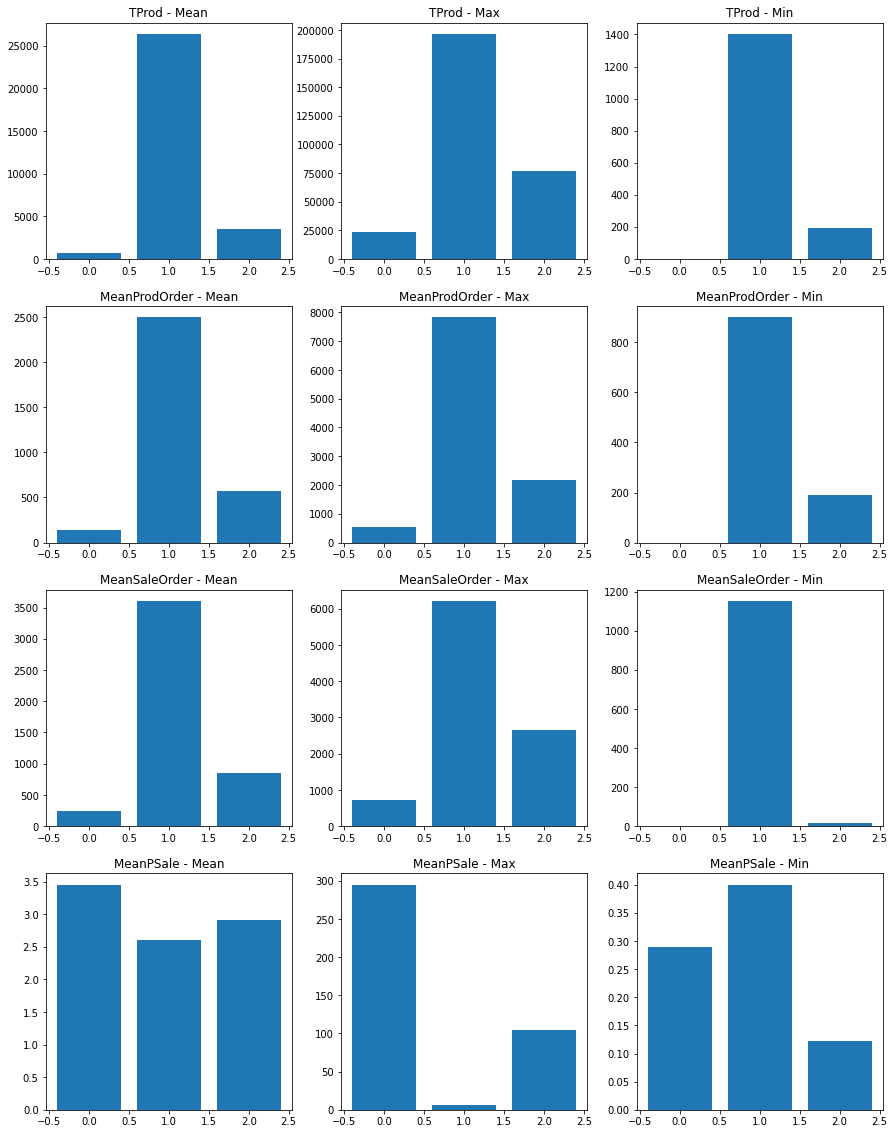

In [23]:
attr = df2.columns
clusters = range(len(clust_list))
fig, axs = plt.subplots(len(attr),3,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
    axs[attr_index][0].bar(clusters, mean_values)
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values)
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values)
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

In [24]:
clust_dict

{0: 3857, 1: 25, 2: 450, 3: 1}